In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
m = 2
b = 0.5
x = np.linspace(0, 4, 100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

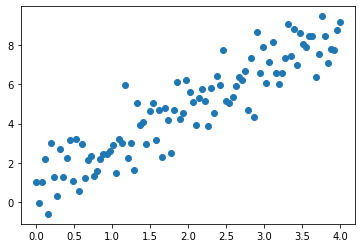

In [8]:
plt.scatter(x, y)

In [9]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias
    
# model = Model()
# model(5.0)    
#    self.weight.assign_sub(15.0)

In [10]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [12]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [13]:
model = Model()
epochs = 100
learning_rate = 0.15

for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 724.0912475585938
Epoch: 1, loss: 514.2970581054688
Epoch: 2, loss: 365.5539855957031
Epoch: 3, loss: 260.0722351074219
Epoch: 4, loss: 185.24859619140625
Epoch: 5, loss: 132.15438842773438
Epoch: 6, loss: 94.46351623535156
Epoch: 7, loss: 67.69361877441406
Epoch: 8, loss: 48.668487548828125
Epoch: 9, loss: 35.137149810791016
Epoch: 10, loss: 25.504255294799805
Epoch: 11, loss: 18.638883590698242
Epoch: 12, loss: 13.739179611206055
Epoch: 13, loss: 10.236506462097168
Epoch: 14, loss: 7.72749137878418
Epoch: 15, loss: 5.925892353057861
Epoch: 16, loss: 4.628496170043945
Epoch: 17, loss: 3.690969228744507
Epoch: 18, loss: 3.0107250213623047
Epoch: 19, loss: 2.514794111251831
Epoch: 20, loss: 2.1512272357940674
Epoch: 21, loss: 1.8829940557479858
Epoch: 22, loss: 1.6836631298065186
Epoch: 23, loss: 1.5343371629714966
Epoch: 24, loss: 1.4214751720428467
Epoch: 25, loss: 1.3353523015975952
Epoch: 26, loss: 1.2689638137817383
Epoch: 27, loss: 1.2172454595565796
Epoch: 28, los

In [14]:
print(model.weight.numpy())
print(model.bias.numpy())

1.9679867
0.85809535


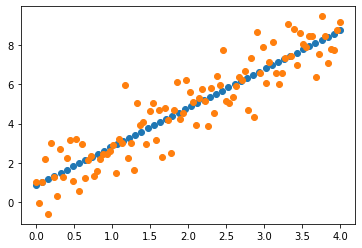

In [16]:
new_x = np.linspace(0, 4, 50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()
plt.scatter(new_x, new_y)
plt.scatter(x, y)